# Feature Engineering

## Date: 12/29/2017

## Author: Hiro Miyake

1. Introduction
2. Load the modules and data set
3. Histogram of the independent variables
4. Standardization
5. Pipeline function in scikit-learn
7. Pair-wise plotting
6. References

# 1. Introduction

In analyzing a data set, often it is better to transform the raw data in one way or another to be able to gain more insights. This notebook explores some of the methods available in scikit-learn using the iris data set.

# 2. Load the modules and data set

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import preprocessing

import seaborn as sns

In [2]:
iris = datasets.load_iris() ## this is a dictionary with data and associated info
print 'Keys for the iris dictionary: ' + str(iris.keys()) ## what are the keys of this dictionary?
print 'Dependent variable labels: ' + str(iris['target_names']) ## what are the dependent variable labels?
#print iris['target'] ## what are the values of the dependent variable in this data set?
print 'Indepndent variable names: ' + str(iris['feature_names']) ## what are the names of the independent variables in this data set?
feature_names = ['sep_l', 'sep_w', 'pet_l', 'pet_w'] ## make column name list to make a dataframe
x = iris.data ## extract the independent variables
y = iris.target ## extract the dependent variables

x = pd.DataFrame(x, columns = feature_names)
y = pd.DataFrame(y, columns = ['y'])
print y['y'].value_counts()

df = pd.concat([y, x], axis = 1)
df.head()

Keys for the iris dictionary: ['target_names', 'data', 'target', 'DESCR', 'feature_names']
Dependent variable labels: ['setosa' 'versicolor' 'virginica']
Indepndent variable names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
2    50
1    50
0    50
Name: y, dtype: int64


,y,sep_l,sep_w,pet_l,pet_w
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


# 3. Histogram of the independent variables

We see that there are 4 independent variables. Let's plot a histogram of each to see how they are distributed.

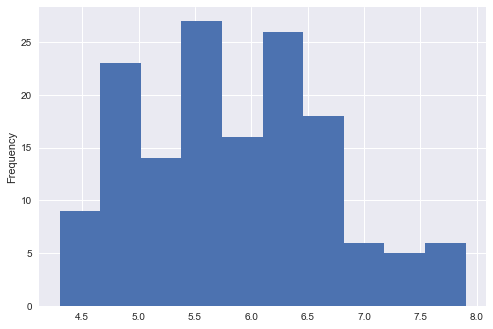

In [3]:
#df['sep_l'].plot() # Makes a line plot.
df['sep_l'].plot.hist()

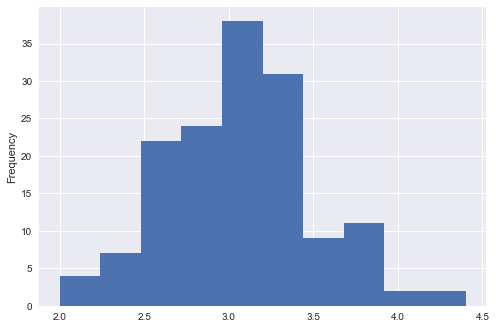

In [4]:
df['sep_w'].plot.hist()

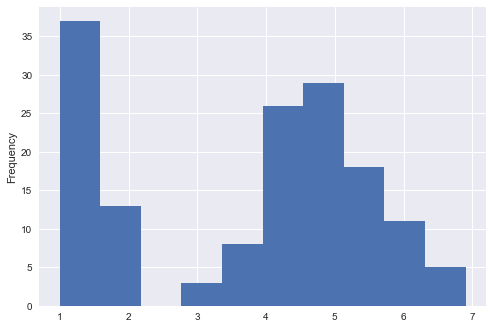

In [5]:
df['pet_l'].plot.hist()

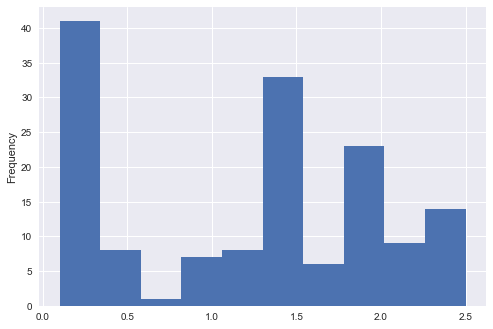

In [6]:
df['pet_w'].plot.hist()

Instead of plotting each feature histogram independently, we can also plot them all on the same plot as below if they are roughly on the same scale, which they are in this case.

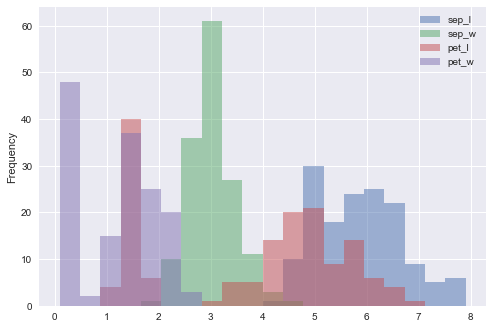

In [7]:
#df.iloc[:,1:].plot.hist(alpha = 0.5)
#x.plot.hist(alpha = 0.5) # Equivalent to above, default bins = 10
df.iloc[:,1:].plot.hist(alpha = 0.5, bins = 20)

We see that different variables have different distributions.

# 4. Standardization

One of the simplest operation you can do is to [standardize](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) the variables. Standardizing means adding an offset to set the mean to zero and dividing by an appropriate number so that the standard deviation of that variable is one. This can be done with the `StandardScaler` function.

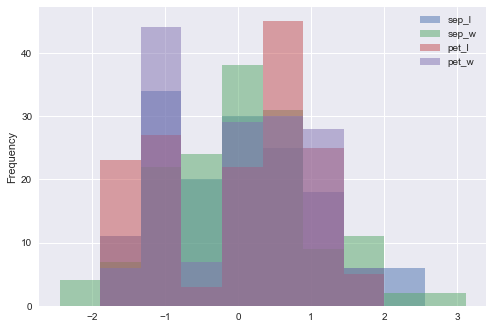

In [8]:
#scaler = preprocessing.StandardScaler().fit(x)
#x_scaled = scaler.transform(x)
x_scaled = preprocessing.StandardScaler().fit_transform(x) # Equivalent to the above two steps combined
x_scaled = pd.DataFrame(x_scaled, columns = feature_names)
x_scaled.plot.hist(alpha = 0.5)

Another way to scale the data is to set the values so that they range from some minimum value to a maximum value using the function `MinMaxScaler`. The default is to set the minimum to 0 and maximum to 1.

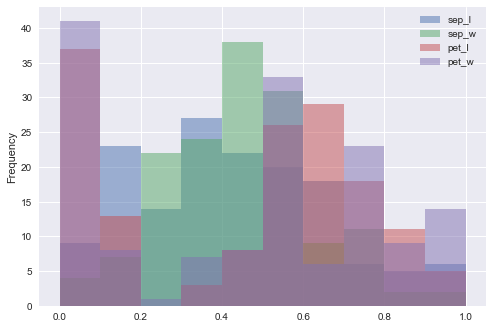

In [9]:
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = feature_names)
x_scaled.plot.hist(alpha = 0.5)

Another approach is to make the range lie between -1 and 1 using the function `MaxAbsScaler`. This is equivalent to dividing all the data points by the maximum value. This is appropriate when your data has a lot of zero entries, because this rescaling will leave the zeros as zeros, whereas the previous two transformations will not.

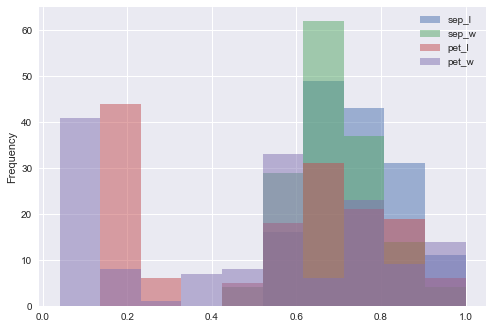

In [10]:
x_scaled = preprocessing.MaxAbsScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = feature_names)
x_scaled.plot.hist(alpha = 0.5)

# 5. `Pipeline` Function in scikit-learn

In cases where you have multiple transformations that you want to apply to both training and testing set, you can use the `Pipeline` function or `make_pipeline` function. These are described in more detail [here](http://scikit-learn.org/stable/modules/pipeline.html).

`Pipeline` can be combined with `GridSearchCV` for efficient hyperparameter optimization and model evaluation. This is described [here](http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html).

# 6. Unsupervised Feature Reduction

You can also use unsupervising learning methods such as principal component analysis for feature selection. This is described [here](http://scikit-learn.org/stable/modules/unsupervised_reduction.html) and [here](http://scikit-learn.org/stable/modules/decomposition.html).

# 7. Pair-wise plotting

Aside from basic plotting with [pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html), to make pair-wise plots of all the variables, you can use seaborn as below. For reasonable sized data sets, this can give you insights on the best approach to feature engineering.

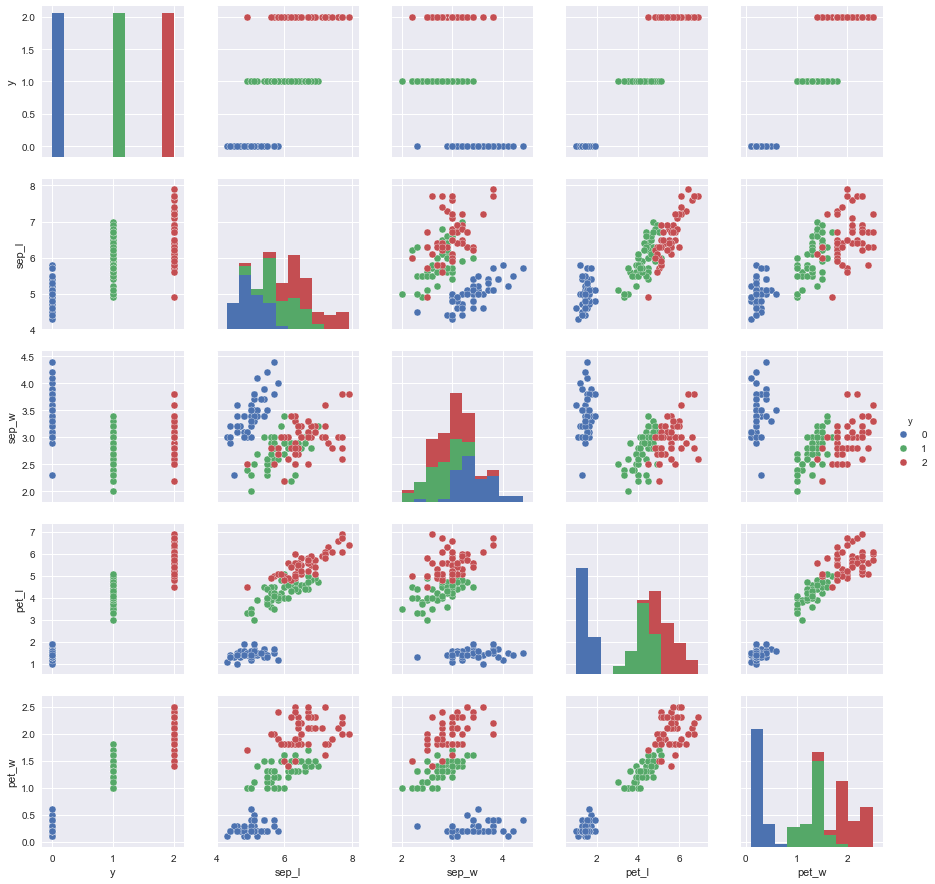

In [11]:
## http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
#g = sns.pairplot(df)
g = sns.pairplot(df, hue = 'y')

# 8. References

1. [\[Scikit-learn\] 4. Dataset transformations](http://scikit-learn.org/stable/data_transforms.html)
2. [\[Scikit-learn\] 4.1. Pipeline and FeatureUnion: combining estimators](http://scikit-learn.org/stable/modules/pipeline.html)
3. [\[Scikit-learn\] 4.3. Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html)
4. [\[Scikit-learn\] 4.4. Unsupervised dimensionality reduction](http://scikit-learn.org/stable/modules/unsupervised_reduction.html)
5. [\[Scikit-learn\] 2.5. Decomposing signals in components (matrix factorization problems)](http://scikit-learn.org/stable/modules/decomposition.html)
6. [\[Scikit-learn\] Selecting dimensionality reduction with Pipeline and GridSearchCV](http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html)
7. [\[Pandas\] Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)